Utworzyć ramkę danych pozwalającą na wyszukiwanie po DrugBank ID informacji o  wszystkich synonimach pod jakimi dany lek występuje. Napisać funkcję, która dla podanego DrugBank ID utworzy i wyrysuje graf synonimów za pomocą biblioteki [NetworkX](https://networkx.org/). Należy zadbać o czytelność generowanego rysunku.

In [121]:
import pandas as pd
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

In [122]:
path = 'data/drugbank_partial.xml'
ns = {'db': 'http://www.drugbank.ca'}

In [123]:
tree = ET.parse(path)
root = tree.getroot()

In [124]:
index = []
data = []
for drug in root.findall('db:drug', ns):
    drug_id = drug.find('db:drugbank-id', ns).text
    name = drug.find('db:name', ns).text
    synonyms = [s.text for s in drug.findall('db:synonyms/db:synonym', ns)]

    index.append(drug_id)
    data.append({
        "Name": name,
        "Synonyms": synonyms,
    })

In [131]:
df = pd.DataFrame(data, index=index)
df

,Name,Synonyms
DB00001,Lepirudin,"[[Leu1, Thr2]-63-desulfohirudin, Desulfatohiru..."
DB00002,Cetuximab,"[Cetuximab, Cétuximab, Cetuximabum]"
DB00003,Dornase alfa,[Deoxyribonuclease (human clone 18-1 protein m...
DB00004,Denileukin diftitox,"[Denileukin, Denileukin diftitox, Interleukin-..."
DB00005,Etanercept,"[Etanercept, etanercept-szzs, etanercept-ykro,..."
...,...,...
DB00104,Octreotide,"[Octreotida, Octreotide, Octreotidum, Octrotide]"
DB00105,Interferon alfa-2b,"[Interferon alfa-2b, Interferon alfa-2b (recom..."
DB00106,Abarelix,[Abarelix]
DB00107,Oxytocin,"[Oxitocina, Oxytocin]"


In [135]:
def synonym_graph(drug_id):
    graph = nx.Graph()
    name = df.loc[drug_id]["Name"]
    graph.add_node(name)
    for synonym in df.loc[drug_id]["Synonyms"]:
        if name != synonym:
            graph.add_edge(name, synonym)

    return graph

In [150]:
def draw_synonyms(drug_id):
    graph = synonym_graph(drug_id)
    
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(graph, k=0.1, seed=2137)
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_size=3000, 
        font_size=10,
        node_color="#dddddd",
        edge_color="#aaaaaa",
        font_weight="bold"
    )
    plt.show()
    

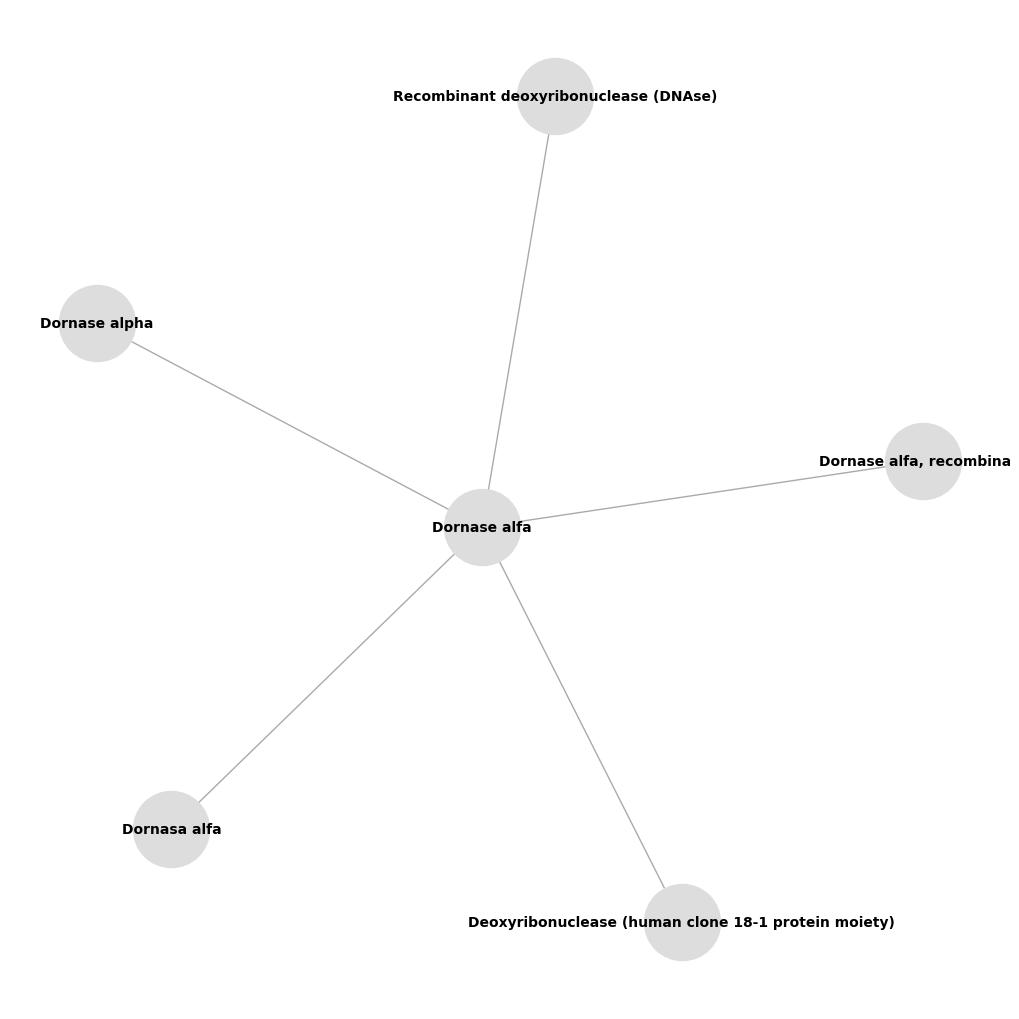

In [151]:
# example usage
draw_synonyms("DB00003")